In [130]:
import numpy as np #import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [151]:
dataset = pd.read_csv('/content/Cancer_dataset.csv') #load your dataset

In [152]:
dataset.isnull().sum() #check for null values in the dataset

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [153]:
print(np.mean(dataset)) #check if your data is normalized - mean = 0, std dev = 1
print(np.std(dataset))

mean_radius         14.127292
mean_texture        19.289649
mean_perimeter      91.969033
mean_area          654.889104
mean_smoothness      0.096360
diagnosis            0.627417
dtype: float64
mean_radius          3.520951
mean_texture         4.297255
mean_perimeter      24.277619
mean_area          351.604754
mean_smoothness      0.014052
diagnosis            0.483493
dtype: float64


In [154]:
data = dataset.drop(['diagnosis'], axis = 1) #PCA is unsupervised learning, hence drop the 'diagnosis' label
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [155]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)  #always normalize your data before PCA

In [156]:
print(np.mean(data)) #check if your data is normalized - mean = 0, std dev = 1
print(np.std(data))

-4.495525217462848e-17
1.0


In [157]:
pca = PCA(n_components=2) #perform PCA with 2 principal components
data_pca = pca.fit_transform(data)

In [160]:
data_after_pca = pd.DataFrame(data = data_pca, columns = ['PC1', 'PC2']) #visualize your data after PCA
data_after_pca.head()

,PC1,PC2
0,1.562077,2.464472
1,2.801064,-0.466274
2,2.848768,0.593637
3,-0.658477,2.624944
4,2.718517,0.897870


In [163]:
print(pca.explained_variance_ratio_) #find out how much variance is explained by each principal component

[0.63446825 0.2042183 ]


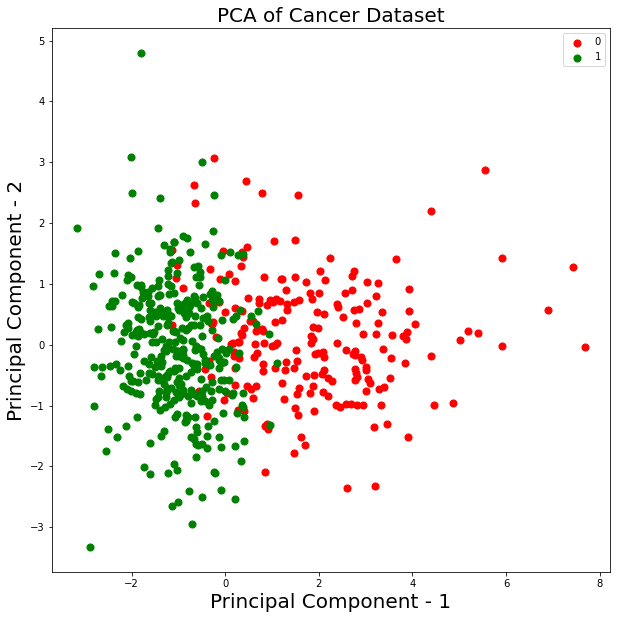

In [166]:
plt.figure(figsize=(10,10)) #visualize your PCA 
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Cancer Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['diagnosis'] == target
    plt.scatter(data_after_pca.loc[indicesToKeep, 'PC1']
               , data_after_pca.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets)